<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/TitaniccleanedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


In [3]:
# Display the first few rows
print(df.head())

# Display basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values or that won't be used
df.drop(columns=['Cabin', 'Ticket'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Convert 'Sex' to a numerical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical variables
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [8]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create a new feature 'IsAlone'
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)


In [7]:
# Drop 'Name' and 'PassengerId' as they are not useful for analysis
df.drop(columns=['Name', 'PassengerId'], inplace=True)


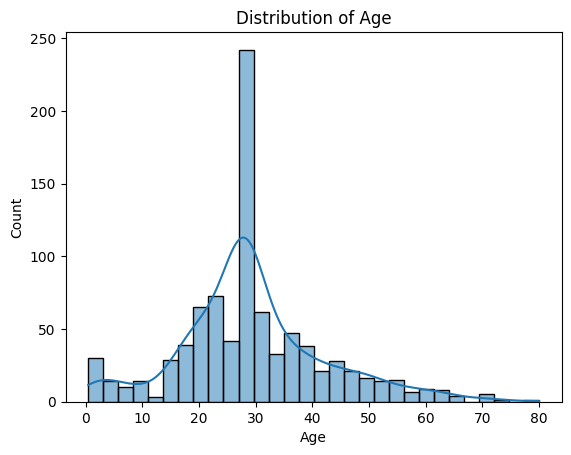

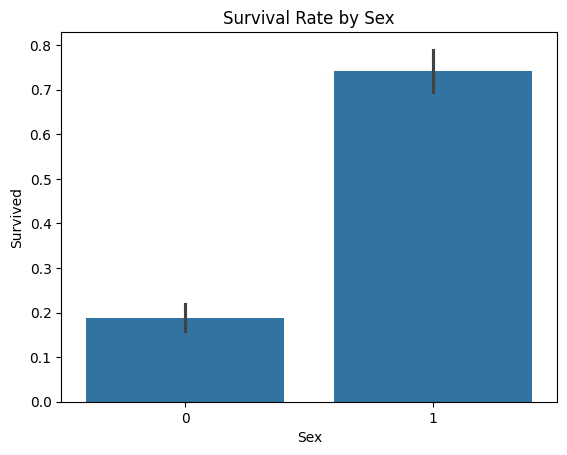

In [9]:
# Visualize the distribution of 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Visualize the survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()


In [10]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_titanic.csv', index=False)
